In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
import PIL
import requests

np.random.seed(613)

In [3]:
file_path = '/Users/taz/Heart-Failure-Prediction/heart.csv'
df = pd.read_csv(file_path)

print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [4]:
import pandas as pd
df = pd.read_csv('/Users/taz/Heart-Failure-Prediction/heart.csv')
df
df.info()
df.isnull().sum()
# Convert categorical features (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope) using Label Encoding or One-Hot Encoding.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df
# Split the data into 80% training and 20% testing.
from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply feature scaling (e.g., using StandardScaler) to numerical columns as required for some algorithms like KNN and SVM.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("\n")

#SVM
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))

Logistic Regression:
Accuracy: 0.8478260869565217
Precision: 0.9072164948453608
Recall: 0.822429906542056


SVM:
Accuracy: 0.8641304347826086
Precision: 0.8942307692307693
Recall: 0.8691588785046729


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate performance
print("KNN Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("\n")
print("F1-Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Classifier:
Accuracy: 0.8478260869565217
Precision: 0.9072164948453608
Recall: 0.822429906542056


F1-Score: 0.8627450980392157
Confusion Matrix:
 [[68  9]
 [19 88]]


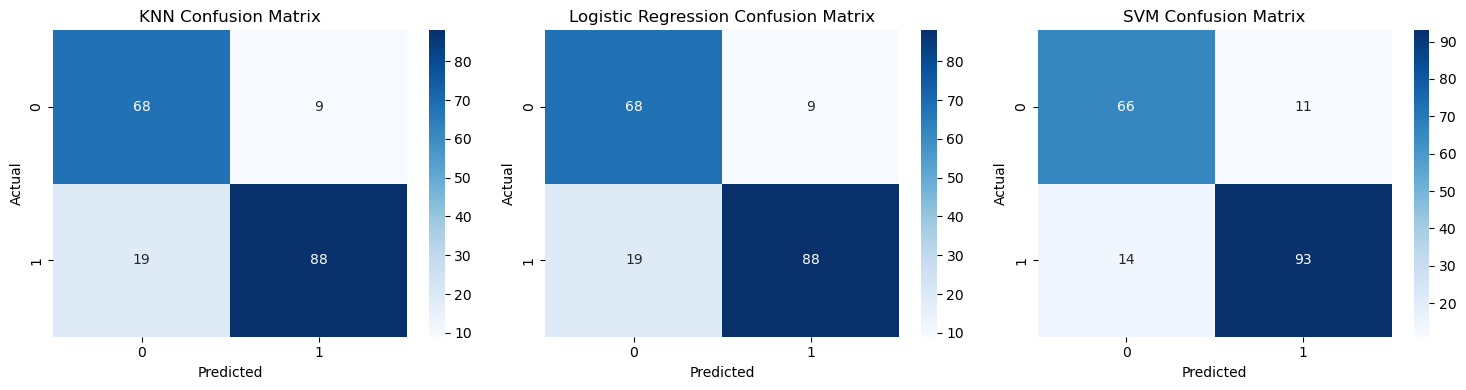

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Dictionary of model names and their predictions
models = {
    "KNN": y_pred_knn,
    "Logistic Regression": y_pred_logreg,
    "SVM": y_pred_svm
}

plt.figure(figsize=(15, 4))

for i, (name, preds) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, preds)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

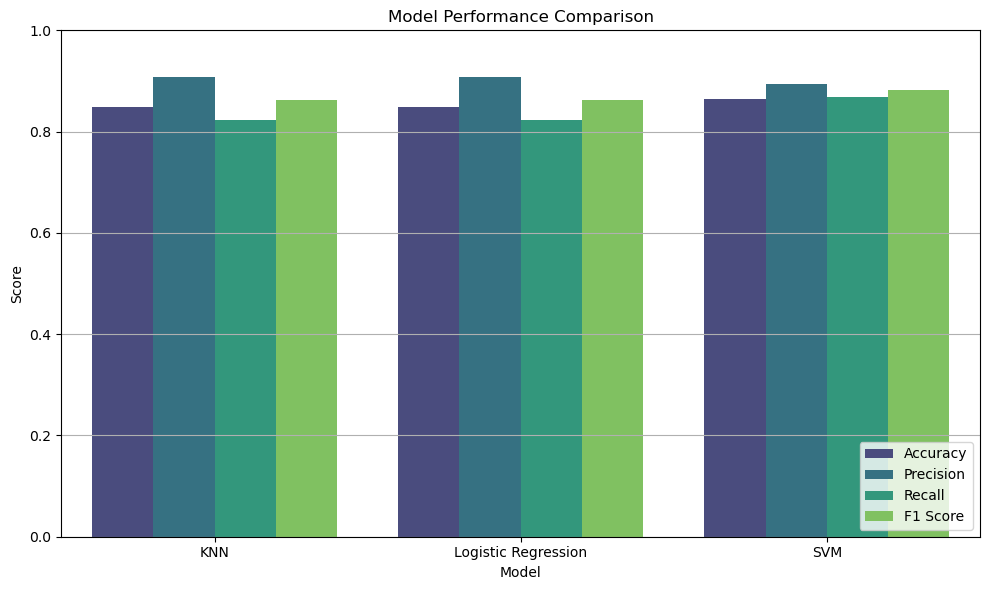

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a summary of metrics
metrics_summary = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

for name, preds in models.items():
    metrics_summary["Model"].append(name)
    metrics_summary["Accuracy"].append(accuracy_score(y_test, preds))
    metrics_summary["Precision"].append(precision_score(y_test, preds))
    metrics_summary["Recall"].append(recall_score(y_test, preds))
    metrics_summary["F1 Score"].append(f1_score(y_test, preds))

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_summary)

# Melt for seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', palette='viridis', data=metrics_melted)
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
# Use GridSearchCV to optimize:
# Logistic Regression: C, solver
from sklearn.model_selection import GridSearchCV
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5)
grid_log.fit(X_train_scaled, y_train)

print("Best Logistic Regression Parameters:", grid_log.best_params_)

# KNN: n_neighbors
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM: C, kernel, gamma
from sklearn.svm import SVC
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train_scaled, y_train)

print("Best SVM Parameters:", grid_svm.best_params_)

Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best KNN Parameters: {'n_neighbors': 5}
Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [22]:
# Evaluate and compare all models using:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy)
accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy)
print("\n")
# Precision
precision = precision_score(y_test, y_pred_svm)
print("SVM Precision:", precision)
precision = precision_score(y_test, y_pred_knn)
print("KNN Precision:", precision)
print("\n")
# Recall
recall = recall_score(y_test, y_pred_svm)
print("SVM Recall:", recall)
recall = recall_score(y_test, y_pred_knn)
print("KNN Recall:", recall)
print("\n")
# F1-Score
f1 = f1_score(y_test, y_pred_svm)
print("SVM F1-Score:", f1)
f1 = f1_score(y_test, y_pred_knn)
print("KNN F1-Score:", f1)
print("\n")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", cm)
cm = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:\n", cm)


SVM Accuracy: 0.8641304347826086
KNN Accuracy: 0.8478260869565217


SVM Precision: 0.8942307692307693
KNN Precision: 0.9072164948453608


SVM Recall: 0.8691588785046729
KNN Recall: 0.822429906542056


SVM F1-Score: 0.881516587677725
KNN F1-Score: 0.8627450980392157


SVM Confusion Matrix:
 [[66 11]
 [14 93]]
KNN Confusion Matrix:
 [[68  9]
 [19 88]]


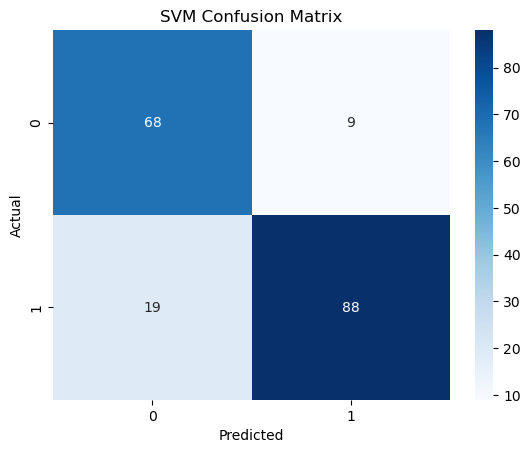

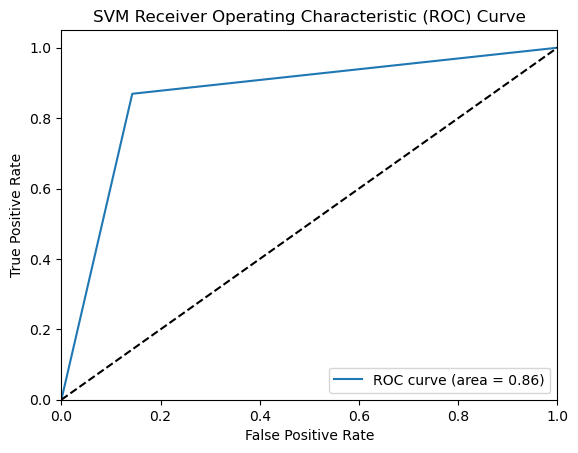

In [17]:
#Plot confusion matrices for SVM.
plot = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Plot the ROC curves and calculate AUC scores to visualize classification performance.
from sklearn.metrics import roc_curve, auc
roc_curve = roc_curve(y_test, y_pred_svm)
roc_auc = auc(roc_curve[0], roc_curve[1])
plt.plot(roc_curve[0], roc_curve[1], label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


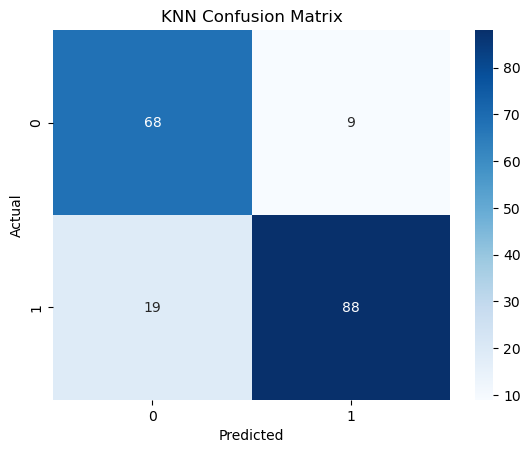

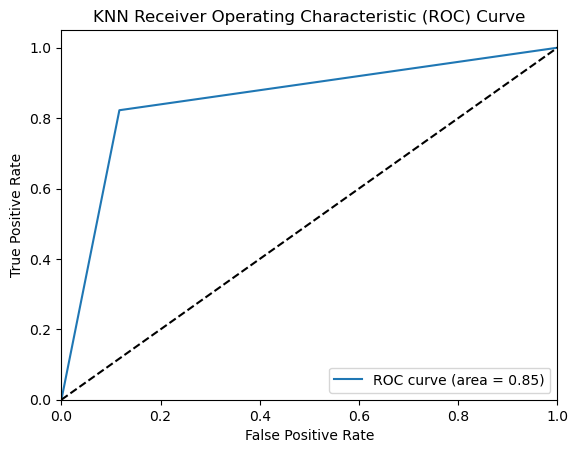

In [18]:
# Plot confusion matrices for KNN.
plot = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Plot the ROC curves and calculate AUC scores to visualize classification performance.
from sklearn.metrics import roc_curve, auc
roc_curve = roc_curve(y_test, y_pred_knn)
roc_auc = auc(roc_curve[0], roc_curve[1])
plt.plot(roc_curve[0], roc_curve[1], label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()